## Question 1

Implementing classification algorithm using the Euclidean distance metric to predict the class of a given iris sample
a. with two dimensions: SepalLength and Sepal Width
b. with all the four features

In [4]:
# i. Load the Iris dataset and split it into a training set and a testing set.
# The testing set contains the first 3 samples of each class

import pandas as pd

df = pd.read_csv("iris.csv")

def split_data_by_class(df, class_column):
    test_indices = []
    for class_name in df[class_column].unique():
        indices = df[df[class_column] == class_name].index[:3]
        test_indices.extend(indices)
    test_set = df.loc[test_indices]
    train_set = df.drop(test_indices)
    return train_set, test_set

# Split the data into training and testing sets based on the "Species" column
train_set, test_set = split_data_by_class(df, "Species")



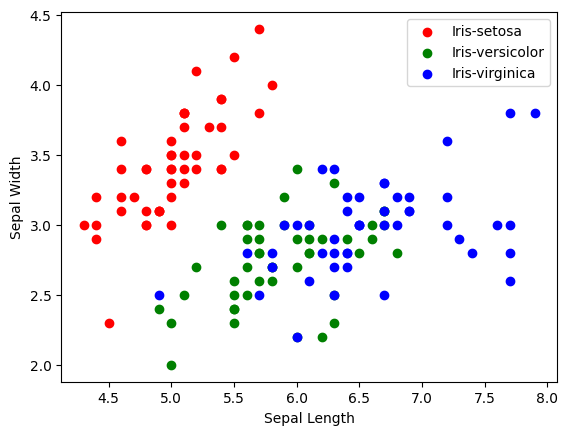

In [5]:
# ii. Plot the training samples
import matplotlib.pyplot as plt

def plot_scatter(train_set, class_column):
    colors = {"Iris-setosa": "red", "Iris-versicolor": "green", "Iris-virginica": "blue"}
    for class_name, group in train_set.groupby(class_column):
        plt.scatter(group["SepalLengthCm"], group["SepalWidthCm"], c=colors[class_name], label=class_name)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()
    plt.show()

# Plot the training samples using a scatter plot
plot_scatter(train_set, "Species")



### Inference from the plot
The plot is the representation for Sepal Width in cm VS Sepal length in Cm .<br>
It can be clearly seen that the width of the sepal for the Iris-setosa is more can can be eaisly classifed from the other 2 just on hte basis of the sepal length and width.

In [6]:
# iii. Function to calculate Euclidean distance
import numpy as np

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)


In [12]:
# iv. Identify the K-nearest neighbors with the smallest Euclidean distances
# for each sample in the testing set. k = [1,3,5,7,9,11]
# v. Perform classification

def classify_sample(train_set, test_sample, k):
    distances = []
    for idx, row in train_set.iterrows():
        distance = euclidean_distance(row["SepalLengthCm"], row["SepalWidthCm"],
                                      test_sample["SepalLengthCm"], test_sample["SepalWidthCm"])
        distances.append((distance, row["Species"]))

    # Sort distances and find K-nearest neighbors
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    print(type(distance))
    # Determine the majority class among the K-nearest neighbors
    class_count = {}
    for _, neighbor_class in neighbors:
        class_count[neighbor_class] = class_count.get(neighbor_class, 0) + 1

    predicted_class = max(class_count, key=class_count.get)
    return predicted_class



In [9]:
# vi. Evaluate accuracy
def calculate_accuracy(train_set, test_set, k):
    correct_predictions = 0
    total_samples = len(test_set)

    for idx, test_sample in test_set.iterrows():
        predicted_class = classify_sample(train_set, test_sample, k)
        if predicted_class == test_sample["Species"]:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

# Define different values of K to experiment with
k_values = [1, 3, 5, 7, 9, 11]

# Calculate accuracy for each K value
for k in k_values:
    accuracy = calculate_accuracy(train_set, test_set, k)
    print(f"Accuracy with k={k}: {accuracy:.2f}")


Accuracy with k=1: 0.44
Accuracy with k=3: 0.56
Accuracy with k=5: 0.56
Accuracy with k=7: 0.56
Accuracy with k=9: 0.56
Accuracy with k=11: 0.56


Using just two features , Sepal Length and Sepal Width, the accuracy for prediction using KNN Classification is not enough

In [14]:
#b Use all the four features

import pandas as pd
import numpy as np

# Load the Iris dataset
df = pd.read_csv("iris.csv")

# Split data by class
def split_data_by_class(df, class_column):
    test_indices = []
    for class_name in df[class_column].unique():
        indices = df[df[class_column] == class_name].index[:3]
        test_indices.extend(indices)
    test_set = df.loc[test_indices]
    train_set = df.drop(test_indices)
    return train_set, test_set

train_set, test_set = split_data_by_class(df, "Species")

# Euclidean distance calculation
def euclidean_distance(sample1, sample2):
    return np.sqrt(np.sum((sample1 - sample2)**2))

# Classification using K-nearest neighbors
def classify_sample(train_set, test_sample, k):
    distances = []
    for idx, row in train_set.iterrows():
        distance = euclidean_distance(row[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]],
                                      test_sample[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])
        distances.append((distance, row["Species"]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    class_count = {}
    for _, neighbor_class in neighbors:
        class_count[neighbor_class] = class_count.get(neighbor_class, 0) + 1

    predicted_class = max(class_count, key=class_count.get)
    return predicted_class

# Calculate accuracy for different K values
def calculate_accuracy(train_set, test_set, k):
    correct_predictions = 0
    total_samples = len(test_set)

    for idx, test_sample in test_set.iterrows():
        predicted_class = classify_sample(train_set, test_sample, k)
        if predicted_class == test_sample["Species"]:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

# Define different values of K to experiment with
k_values = [1, 3, 5, 7, 9, 11]

# Calculate accuracy for each K value
for k in k_values:
    accuracy = calculate_accuracy(train_set, test_set, k)
    print(f"Accuracy with k={k}: {accuracy:.2f}")


Accuracy with k=1: 1.00
Accuracy with k=3: 1.00
Accuracy with k=5: 1.00
Accuracy with k=7: 1.00
Accuracy with k=9: 1.00
Accuracy with k=11: 1.00


The accuracy with all the four features is 100%.
I can infer that increasing the number of dimensions for this analysis increased the accuracy significantly.